In [11]:
import pandas as pd
import numpy as np
data=pd.read_csv('Bengaluru_House_Data.csv')

In [12]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [13]:
data.shape

(13320, 9)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [15]:
for column in data.columns:
    print(data[column].value_counts())
    print("*"*20)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
********************
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
********************
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
********************
size
2 BHK    

In [16]:
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [18]:
data.drop(columns=['area_type','availability','society','balcony'],inplace=True)

In [19]:
data.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [21]:
data['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [22]:
data['location']=data['location'].fillna('Sarjapur Road')

In [23]:
data['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [24]:
data['size']=data['size'].fillna('2 BHK')

In [25]:
data['bath']=data['bath'].fillna(data['bath'].median())

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [27]:
data['bhk']=data['size'].str.split().str.get(0).astype(int)

In [28]:
data[data.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [29]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [30]:
def convertRange(x):
    temp=x.split('-')
    if len(temp) == 2:
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [31]:
data['total_sqft']=data['total_sqft'].apply(convertRange)

In [32]:
data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [33]:
data['price_per_sqft']=data['price']*100000/data['total_sqft']

In [34]:
data['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [35]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [36]:
data['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Uvce Layout                         1
Abshot Layout                       1
Name: count, Length: 1306, dtype: int64

In [39]:
data['location']=data['location'].apply(lambda x: x.strip())
location_count=data['location'].value_counts()

In [40]:
location_count

location
Whitefield                            541
Sarjapur  Road                        399
Electronic City                       304
Kanakpura Road                        273
Thanisandra                           237
                                     ... 
1Channasandra                           1
Hosahalli                               1
Vijayabank bank layout                  1
near Ramanashree California resort      1
Abshot Layout                           1
Name: count, Length: 1295, dtype: int64

In [42]:
location_count_less_10=location_count[location_count<=10]
location_count_less_10

location
BTM 1st Stage                         10
Nagadevanahalli                       10
Basapura                              10
Sector 1 HSR Layout                   10
Dairy Circle                          10
                                      ..
1Channasandra                          1
Hosahalli                              1
Vijayabank bank layout                 1
near Ramanashree California resort     1
Abshot Layout                          1
Name: count, Length: 1054, dtype: int64

In [43]:
data['location']=data['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)

In [46]:
data['location'].value_counts()

location
other                 2886
Whitefield             541
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: count, Length: 242, dtype: int64

In [45]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [47]:
(data['total_sqft']/data['bhk']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [48]:
data=data[((data['total_sqft']/data['bhk'])>=300)]
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [49]:
data.shape

(12530, 7)

In [50]:
data.price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [52]:
def remove_outliers_sqft(df):
    df_output=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)

        st=np.std(subdf.price_per_sqft)
        gen_df=subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <=(m+st))]
        df_output=pd.concat([df_output,gen_df],ignore_index=True)
    return df_output
data=remove_outliers_sqft(data)
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000
mean,1467.307519,2.420625,83.375893,2.533875,5415.916539
std,876.986816,0.912160,71.338631,0.854351,1797.535814
min,300.000000,1.000000,10.000000,1.000000,2439.024390
25%,1101.000000,2.000000,50.000000,2.000000,4334.771897
50%,1270.000000,2.000000,65.310000,2.000000,5109.489051
75%,1600.000000,3.000000,91.465000,3.000000,6077.889719
max,30400.000000,16.000000,2100.000000,16.000000,24166.666667


In [62]:
def bhk_outlier_remover(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
             stats=bhk_stats.get(bhk-1)
             if stats and stats['count']>5:
                 exclude_indices=np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [63]:
data=bhk_outlier_remover(data)

In [64]:
data.shape

(4989, 7)

In [65]:
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
1,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
2,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
3,1st Phase JP Nagar,4 BHK,2825.0,4.0,250.0,4,8849.557522
4,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667
...,...,...,...,...,...,...,...
7001,other,3 BHK,1500.0,2.0,78.0,3,5200.000000
7003,other,2 BHK,1155.0,2.0,64.0,2,5541.125541
7004,other,3 BHK,1508.0,3.0,77.0,3,5106.100796
7005,other,2 BHK,1200.0,2.0,70.0,2,5833.333333


In [66]:
data.drop(columns=['size','price_per_sqft'],inplace=True)

In [67]:
data.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,1630.0,3.0,194.0,3
1,1st Block Jayanagar,1875.0,2.0,235.0,3
2,1st Block Jayanagar,1235.0,2.0,148.0,2
3,1st Phase JP Nagar,2825.0,4.0,250.0,4
4,1st Phase JP Nagar,1875.0,3.0,167.0,3


In [68]:
data.to_csv("Cleaned_data.csv")

In [69]:
X=data.drop(columns=['price'])
y=data['price']

In [84]:
from sklearn.model_selection import train_test_spilt
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

ImportError: cannot import name 'train_test_spilt' from 'sklearn.model_selection' (C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\__init__.py)

In [81]:
X_train,X_test,y_train,y_test=train_test_spilt(X,y,test_size=0.2,random_state=0)

NameError: name 'train_test_spilt' is not defined

In [74]:
print(X_train.shape)
print(X_test.shape)

NameError: name 'X_train' is not defined

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 7))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

NameError: name 'data' is not defined

<Figure size 1000x700 with 0 Axes>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
 
data = pd.read_csv("Cleaned_data.csv")
print(data.head(5))

   Unnamed: 0             location  total_sqft  bath  price  bhk
0           0  1st Block Jayanagar      2850.0   4.0  428.0    4
1           1  1st Block Jayanagar      1630.0   3.0  194.0    3
2           2  1st Block Jayanagar      1875.0   2.0  235.0    3
3           3  1st Block Jayanagar      1200.0   2.0  130.0    3
4           4  1st Block Jayanagar      1235.0   2.0  148.0    2


In [18]:
data.shape

(7227, 6)

In [19]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 1
Integer variables: 0
Float variables: 3


In [21]:
plt.figure(figsize=(11, 6))
sns.heatmap(data.head(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

ValueError: could not convert string to float: '1st Block Jayanagar'

<Figure size 1100x600 with 0 Axes>

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'total_sqft'}>],
       [<Axes: title={'center': 'bath'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'bhk'}>, <Axes: >]], dtype=object)

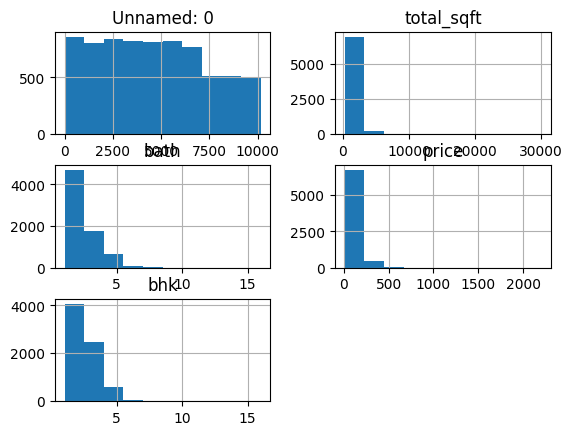

In [24]:
data_new=pd.read_csv('Cleaned_data.csv')
data_new.hist()

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'total_sqft'}>],
       [<Axes: title={'center': 'bath'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'bhk'}>, <Axes: >]], dtype=object)

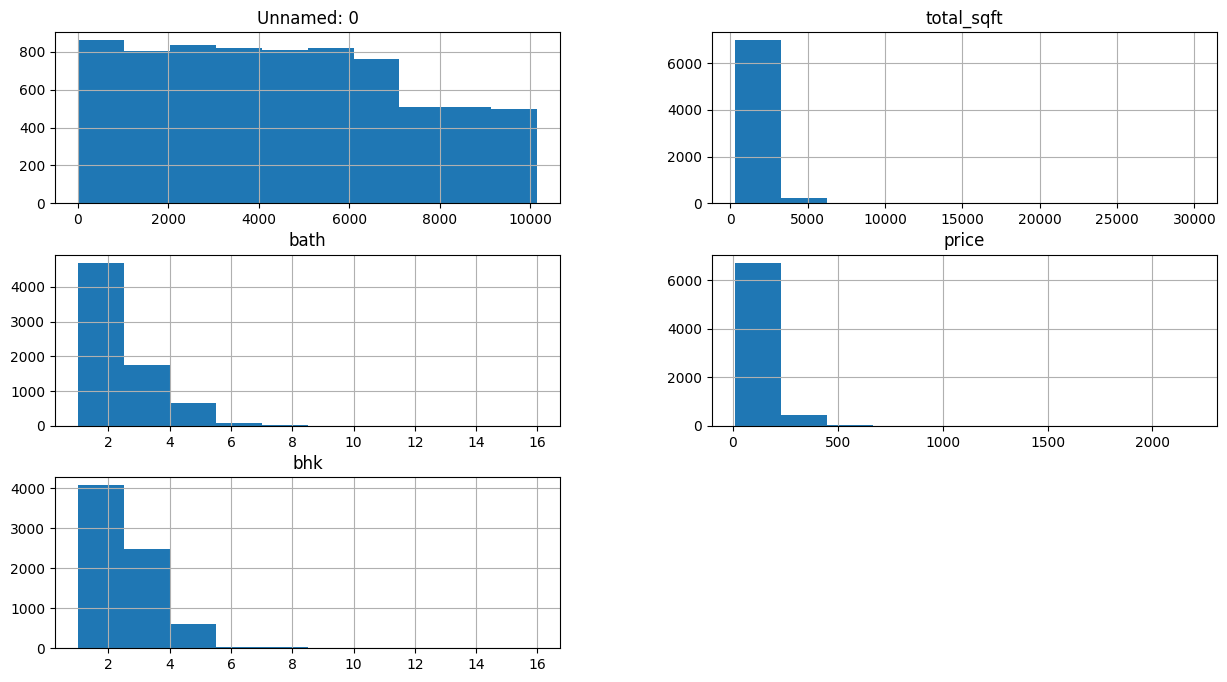

In [25]:
data_new.hist(figsize=(15,8))

In [33]:
plt.figure(figsize = (15, 8))
sns.heatmap(data_new.corr(), annot = True, cmap="YlGnBu")
plt.show()

ValueError: could not convert string to float: '1st Block Jayanagar'

<Figure size 1500x800 with 0 Axes>

In [27]:
df = pd.read_csv("Cleaned_data.csv")
 
# Printing the first 10 rows of the data frame for visualization
df[:2778]

,Unnamed: 0,location,total_sqft,bath,price,bhk
0,0,1st Block Jayanagar,2850.0,4.0,428.00,4
1,1,1st Block Jayanagar,1630.0,3.0,194.00,3
2,2,1st Block Jayanagar,1875.0,2.0,235.00,3
3,3,1st Block Jayanagar,1200.0,2.0,130.00,3
4,4,1st Block Jayanagar,1235.0,2.0,148.00,2
...,...,...,...,...,...,...
2773,3373,Hosur Road,950.0,2.0,60.00,2
2774,3374,Hosur Road,1194.0,2.0,71.64,2
2775,3375,Hosur Road,1766.0,3.0,130.00,3
2776,3376,Hosur Road,1689.0,3.0,103.00,3


In [30]:
df.corr(method='kendall')

ValueError: could not convert string to float: '1st Block Jayanagar'

In [1]:
df


NameError: name 'df' is not defined

In [2]:
df = pd.read_csv("Cleaned_data.csv")
 
# Printing the first 10 rows of the data frame for visualization
df[:2778]


NameError: name 'pd' is not defined

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv("Cleaned_data.csv")
 
# Printing the first 10 rows of the data frame for visualization
df[:2778]

C:\Users\HP\AppData\Local\Temp\ipykernel_20612\3349206694.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Unnamed: 0,location,total_sqft,bath,price,bhk
0,0,1st Block Jayanagar,2850.0,4.0,428.00,4
1,1,1st Block Jayanagar,1630.0,3.0,194.00,3
2,2,1st Block Jayanagar,1875.0,2.0,235.00,3
3,3,1st Block Jayanagar,1200.0,2.0,130.00,3
4,4,1st Block Jayanagar,1235.0,2.0,148.00,2
...,...,...,...,...,...,...
2773,3373,Hosur Road,950.0,2.0,60.00,2
2774,3374,Hosur Road,1194.0,2.0,71.64,2
2775,3375,Hosur Road,1766.0,3.0,130.00,3
2776,3376,Hosur Road,1689.0,3.0,103.00,3


In [6]:
df.to_csv('Cleaned_data.csv',index = False)

In [7]:
df

,Unnamed: 0,location,total_sqft,bath,price,bhk
0,0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...,...
7222,10144,other,1200.0,2.0,70.0,2
7223,10145,other,1800.0,1.0,200.0,1
7224,10148,other,1353.0,2.0,110.0,2
7225,10149,other,812.0,1.0,26.0,1


In [8]:
df.to_csv('Cleaned_data.csv',index = False)
df

,Unnamed: 0,location,total_sqft,bath,price,bhk
0,0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...,...
7222,10144,other,1200.0,2.0,70.0,2
7223,10145,other,1800.0,1.0,200.0,1
7224,10148,other,1353.0,2.0,110.0,2
7225,10149,other,812.0,1.0,26.0,1


In [9]:
pd.read_csv(io.StringIO(df.to_csv()), index_col=[0])

NameError: name 'io' is not defined

In [10]:
df.to_csv('Cleaned_data.csv', index=False)

In [11]:
df

,Unnamed: 0,location,total_sqft,bath,price,bhk
0,0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...,...
7222,10144,other,1200.0,2.0,70.0,2
7223,10145,other,1800.0,1.0,200.0,1
7224,10148,other,1353.0,2.0,110.0,2
7225,10149,other,812.0,1.0,26.0,1


In [12]:
df=pd.read_csv('Cleaned_data.csv',index_col=0)

In [13]:
df

,location,total_sqft,bath,price,bhk
Unnamed: 0,,,,,
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10144,other,1200.0,2.0,70.0,2
10145,other,1800.0,1.0,200.0,1
10148,other,1353.0,2.0,110.0,2


In [15]:
df=pd.read_csv("Cleaned_data.csv")
df=df.iloc[: , 1:]

In [16]:
df.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [17]:
df

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
7222,other,1200.0,2.0,70.0,2
7223,other,1800.0,1.0,200.0,1
7224,other,1353.0,2.0,110.0,2
7225,other,812.0,1.0,26.0,1


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'total_sqft'}>],
       [<Axes: title={'center': 'bath'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'bhk'}>, <Axes: >]], dtype=object)

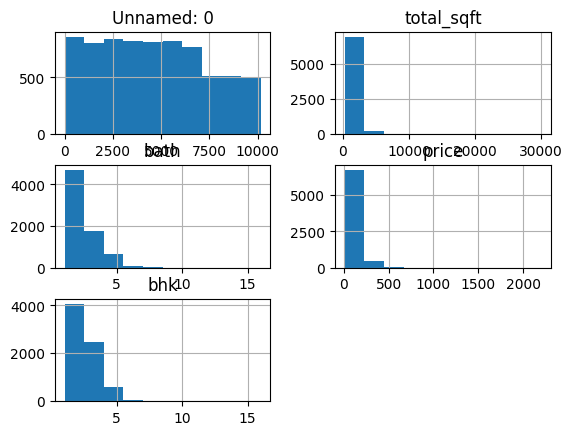

In [18]:
data_new=pd.read_csv('Cleaned_data.csv')
data_new.hist()

In [19]:
df

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
7222,other,1200.0,2.0,70.0,2
7223,other,1800.0,1.0,200.0,1
7224,other,1353.0,2.0,110.0,2
7225,other,812.0,1.0,26.0,1


array([[<Axes: title={'center': 'total_sqft'}>,
        <Axes: title={'center': 'bath'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bhk'}>]], dtype=object)

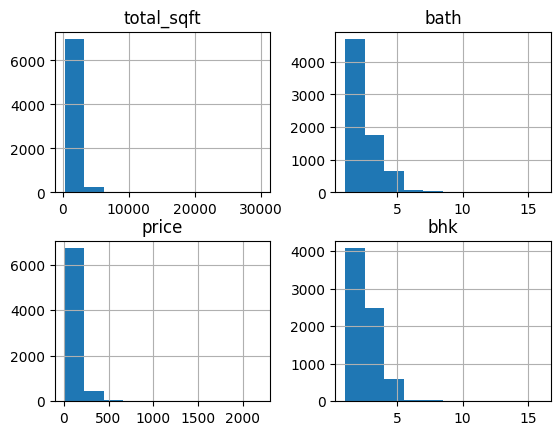

In [20]:
df.hist()

array([[<Axes: title={'center': 'total_sqft'}>,
        <Axes: title={'center': 'bath'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bhk'}>]], dtype=object)

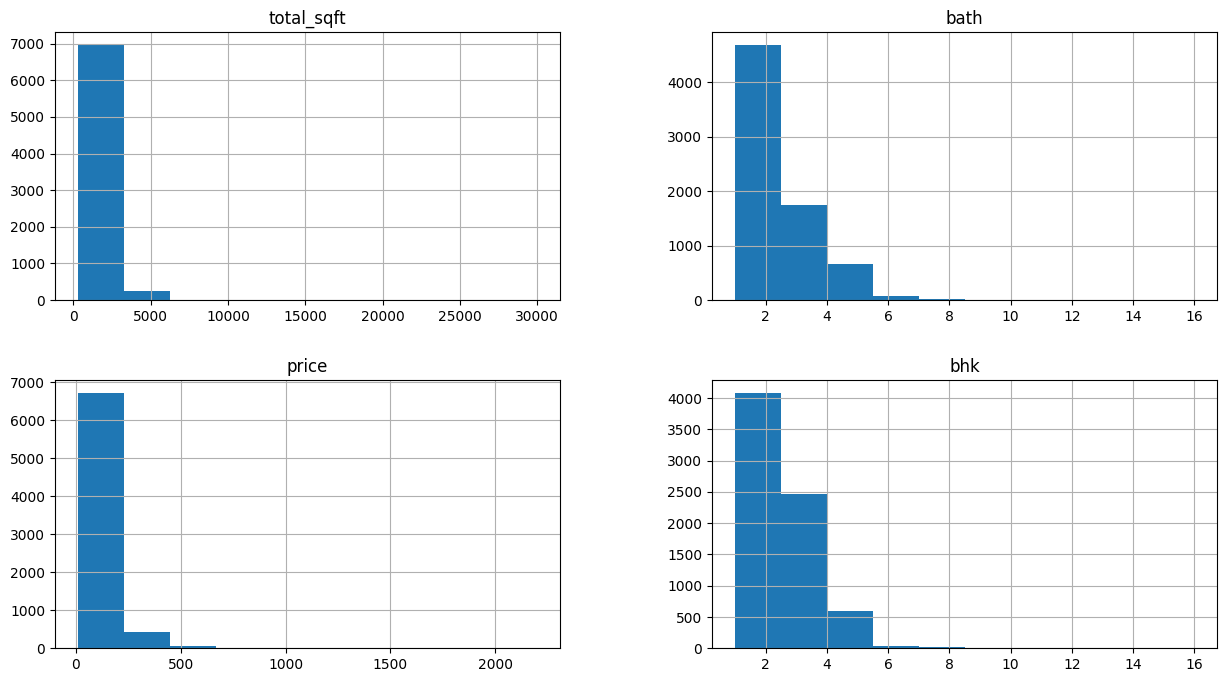

In [21]:
df.hist(figsize=(15,8))

In [22]:
data_new=pd.read_csv('newcleand_data.csv')

In [23]:
data_new

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4,428.0,4
1,1st Block Jayanagar,1630.0,3,194.0,3
2,1st Block Jayanagar,1875.0,2,235.0,3
3,1st Block Jayanagar,1200.0,2,130.0,3
4,1st Block Jayanagar,1235.0,2,148.0,2
...,...,...,...,...,...
7222,other,1200.0,2,70.0,2
7223,other,1800.0,1,200.0,1
7224,other,1353.0,2,110.0,2
7225,other,812.0,1,26.0,1


In [24]:
data_new.hist

<bound method hist_frame of                  location  total_sqft  bath  price  bhk
0     1st Block Jayanagar      2850.0     4  428.0    4
1     1st Block Jayanagar      1630.0     3  194.0    3
2     1st Block Jayanagar      1875.0     2  235.0    3
3     1st Block Jayanagar      1200.0     2  130.0    3
4     1st Block Jayanagar      1235.0     2  148.0    2
...                   ...         ...   ...    ...  ...
7222                other      1200.0     2   70.0    2
7223                other      1800.0     1  200.0    1
7224                other      1353.0     2  110.0    2
7225                other       812.0     1   26.0    1
7226                other      3600.0     5  400.0    4

[7227 rows x 5 columns]>

array([[<Axes: title={'center': 'total_sqft'}>,
        <Axes: title={'center': 'bath'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bhk'}>]], dtype=object)

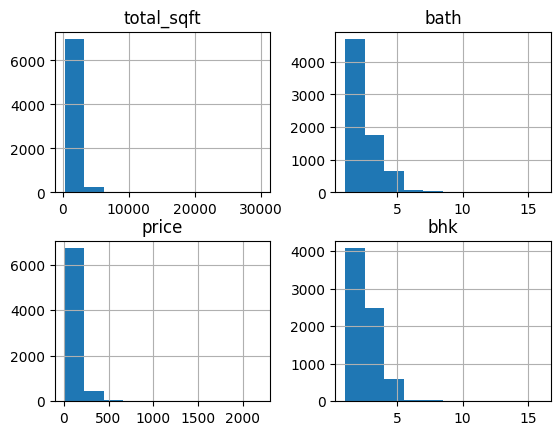

In [25]:
data_new.hist()

In [27]:
plt.figure(figsize = (15, 6))
sns.heatmap(data_new.corr(), annot = True, cmap="YlGnBu")
plt.show()

ValueError: could not convert string to float: '1st Block Jayanagar'

<Figure size 1500x600 with 0 Axes>

In [28]:
sns.heatmap(data_new.corr(), annot = True, cmap="YlGnBu")

ValueError: could not convert string to float: '1st Block Jayanagar'